## Import libraries & load data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imbalanced-learn


#configure visuals
sns.set(style ="whitegrid")

# load dataset
df = pd.read_csv("C:/Pyhton_DS/Portfolio/campaign_response_prediction/marketing_campaign.csv", sep='\t')
df.columns = df.columns.str.strip()


#preview
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning

In [10]:
# Check missinh values
df.isnull().sum()

# Drop rows with missing data 
df = df.dropna()

# convert data column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Create age variable
df['Age'] = 2024 - df['Year_Birth']

# create total spending variable
df['Total_Spend'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds']].sum(axis=1)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')



## Exploratory Data Analysis

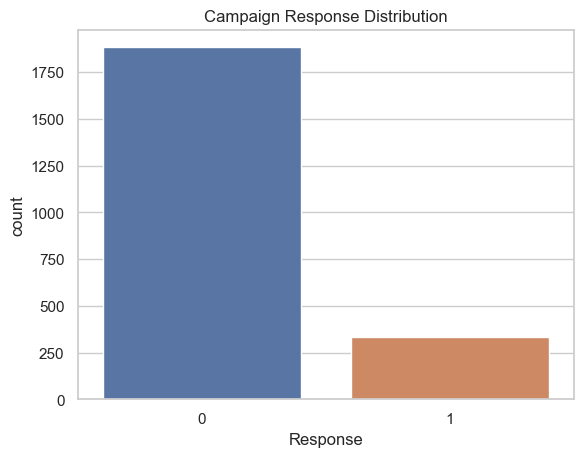

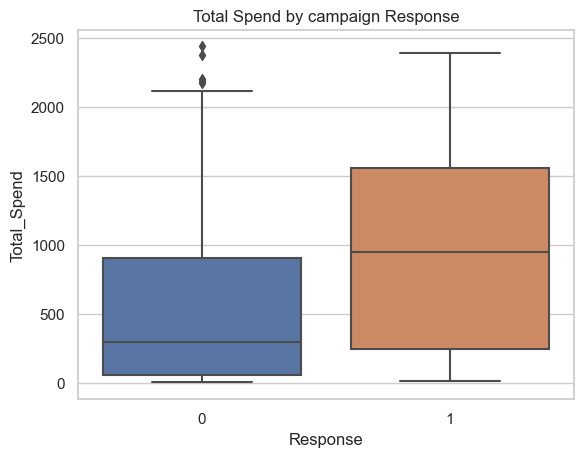

<function matplotlib.pyplot.show(close=None, block=None)>

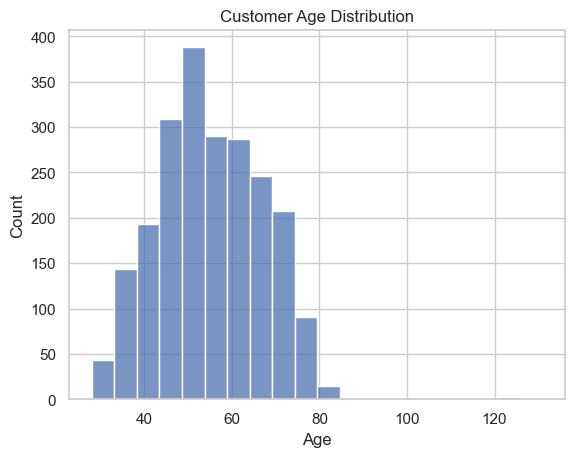

In [6]:
# Distribution of Response
sns.countplot(data = df, x = 'Response')
plt.title ("Campaign Response Distribution")
plt.show()

# Spending vs. campaign response
sns.boxplot(data =df , x ='Response', y = 'Total_Spend')
plt.title("Total Spend by campaign Response")
plt.show()

# Age distribution
sns.histplot(df['Age'],bins = 20)
plt.title("Customer Age Distribution")
plt.show

## Predictive Modeling -Campaign Response

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Feature selection
features = ['Income', 'Age', 'Kidhome', 'Teenhome', 'Recency',
            'NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'Total_Spend']
X = df[features]
y = df['Response']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training set
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train model using balanced data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_res, y_res)

# Predict on original test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       569
           1       0.53      0.61      0.57        96

    accuracy                           0.87       665
   macro avg       0.73      0.76      0.75       665
weighted avg       0.88      0.87      0.87       665

[[517  52]
 [ 37  59]]
